In [79]:
import pandas as pd
import numpy as np
import os

code = "48_40_5_6"
mask = 0.3
# code = "60_50_5_6"

# checking to see if failures get bigger random errors

# full_path = os.path.realpath(__file__)
# path, filename = os.path.split(full_path)
# filename = os.path.join(path, f"./data/{code}_cluster_size.res")
df = pd.read_csv(f"./data/{mask}/{code}_cluster_size.res", sep=';', header=None)

cols = [str(i) for i in range(len(df.iloc[0]))]

success_tmp = []
for i in range(len(df)):
    if ("+" in df.iloc[i][len(df.iloc[0]) - 1]):
        success_tmp.append(0)
    else:
        success_tmp.append(1)

df.replace({"\*|\+|\(|\)":""}, regex=True, inplace=True)

df_arr = []
for i in range(len(df)):
    tmp = []
    row = df.iloc[i]
    for j in range(len(df.iloc[0])):
        x = row[j].split(',')
        # tup = (int(x[0]), int(x[1]))
        # tmp.append(tup)
        tmp.append(int(x[0]))
    df_arr.append(tmp)

num_df = pd.DataFrame(df_arr)
num_df["success"] = success_tmp

successes = num_df[num_df["success"] == 1]
fails = num_df[num_df["success"] == 0]

print(num_df.head())

   0  1  2  3  4  5  6  7  8  9  ...  193  194  195  196  197  198  199  200  \
0  1  1  1  1  1  1  5  2  2  2  ...    1    2    4    4    4    4    4    4   
1  1  1  1  1  1  1  1  1  1  1  ...    6    6    6    6    6    6    6    6   
2  1  2  1  2  1  1  1  1  1  2  ...    1    1    1    1    1    2    1    1   
3  1  1  1  1  1  1  2  1  1  1  ...    1    1    1    1    1    1    1    1   
4  1  1  2  2  1  1  1  1  1  1  ...    3    3    3    3    3    3    3    3   

   201  success  
0    4        0  
1    6        0  
2    1        1  
3    1        1  
4    3        0  

[5 rows x 203 columns]


In [69]:
def find_error_size(df):
    s = 0
    for i in range(len(df)):
        x = df.iloc[i]
        for j in range(0, len(df.iloc[0])-1):
            s += x[j][0]
    s /= (len(df) * (len(df.iloc[0])-1))
    return s

print(find_error_size(num_df))
print(find_error_size(successes))
print(find_error_size(fails))

2.1956067040909426
2.193559398625793
2.2038323885158966


In [44]:
def find_average_random_error(df):

    s = 0
    for i in range(len(df)):
        x = df.iloc[i]
        for j in range(1, len(df.iloc[0])-1):
            s += (x[j][0] - x[j-1][1])
    s /= (len(df) * (len(df.iloc[0])-1))
    print(s)

find_average_random_error(successes)
find_average_random_error(fails)

3.87957112294144
3.897373132147163


We find that runs that end in a successful decoding have an average random error size (per round) that is only 0.04% smaller than runs that ultimately failed. This is in stark comparison to the difference in average increase in largest error cluster size. Here the successful decodings on average had an increase in the largest cluster size that is 10% less than the average for decoding runs that failed. 

0.4 cluster size increase

0.28653936822253656 - success

0.29830536245113876 - fail

0.4 error size increase

3.861895708109826 - success

3.864351872975316 - fail

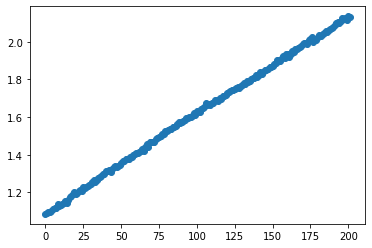

In [80]:
import matplotlib.pyplot as plt

data = [num_df[i].mean() for i in range(len(num_df.iloc[0])-1)]
xs = np.arange(202)

plt.scatter(xs, data)